**Forecasting Average Prices of Avocados with FB Prophet**

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import random

In [54]:
df = pd.read_csv('avocado.csv')

**Inspect Data**

In [55]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [56]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [57]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [59]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


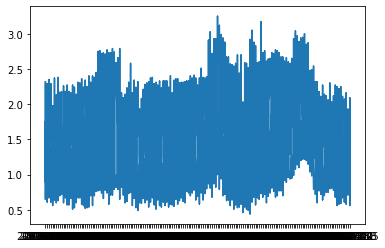

In [60]:
df = df.sort_values('Date')
plt.plot(df.Date, df.AveragePrice)

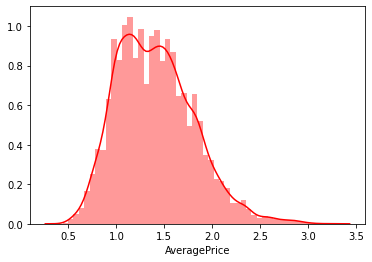

In [61]:
sns.distplot(df.AveragePrice, color='r')

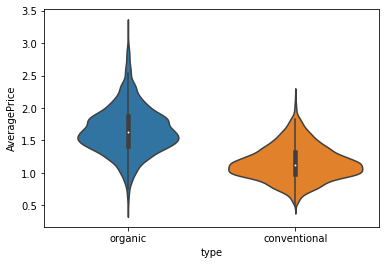

In [62]:
sns.violinplot(x='type', y='AveragePrice', data=df)

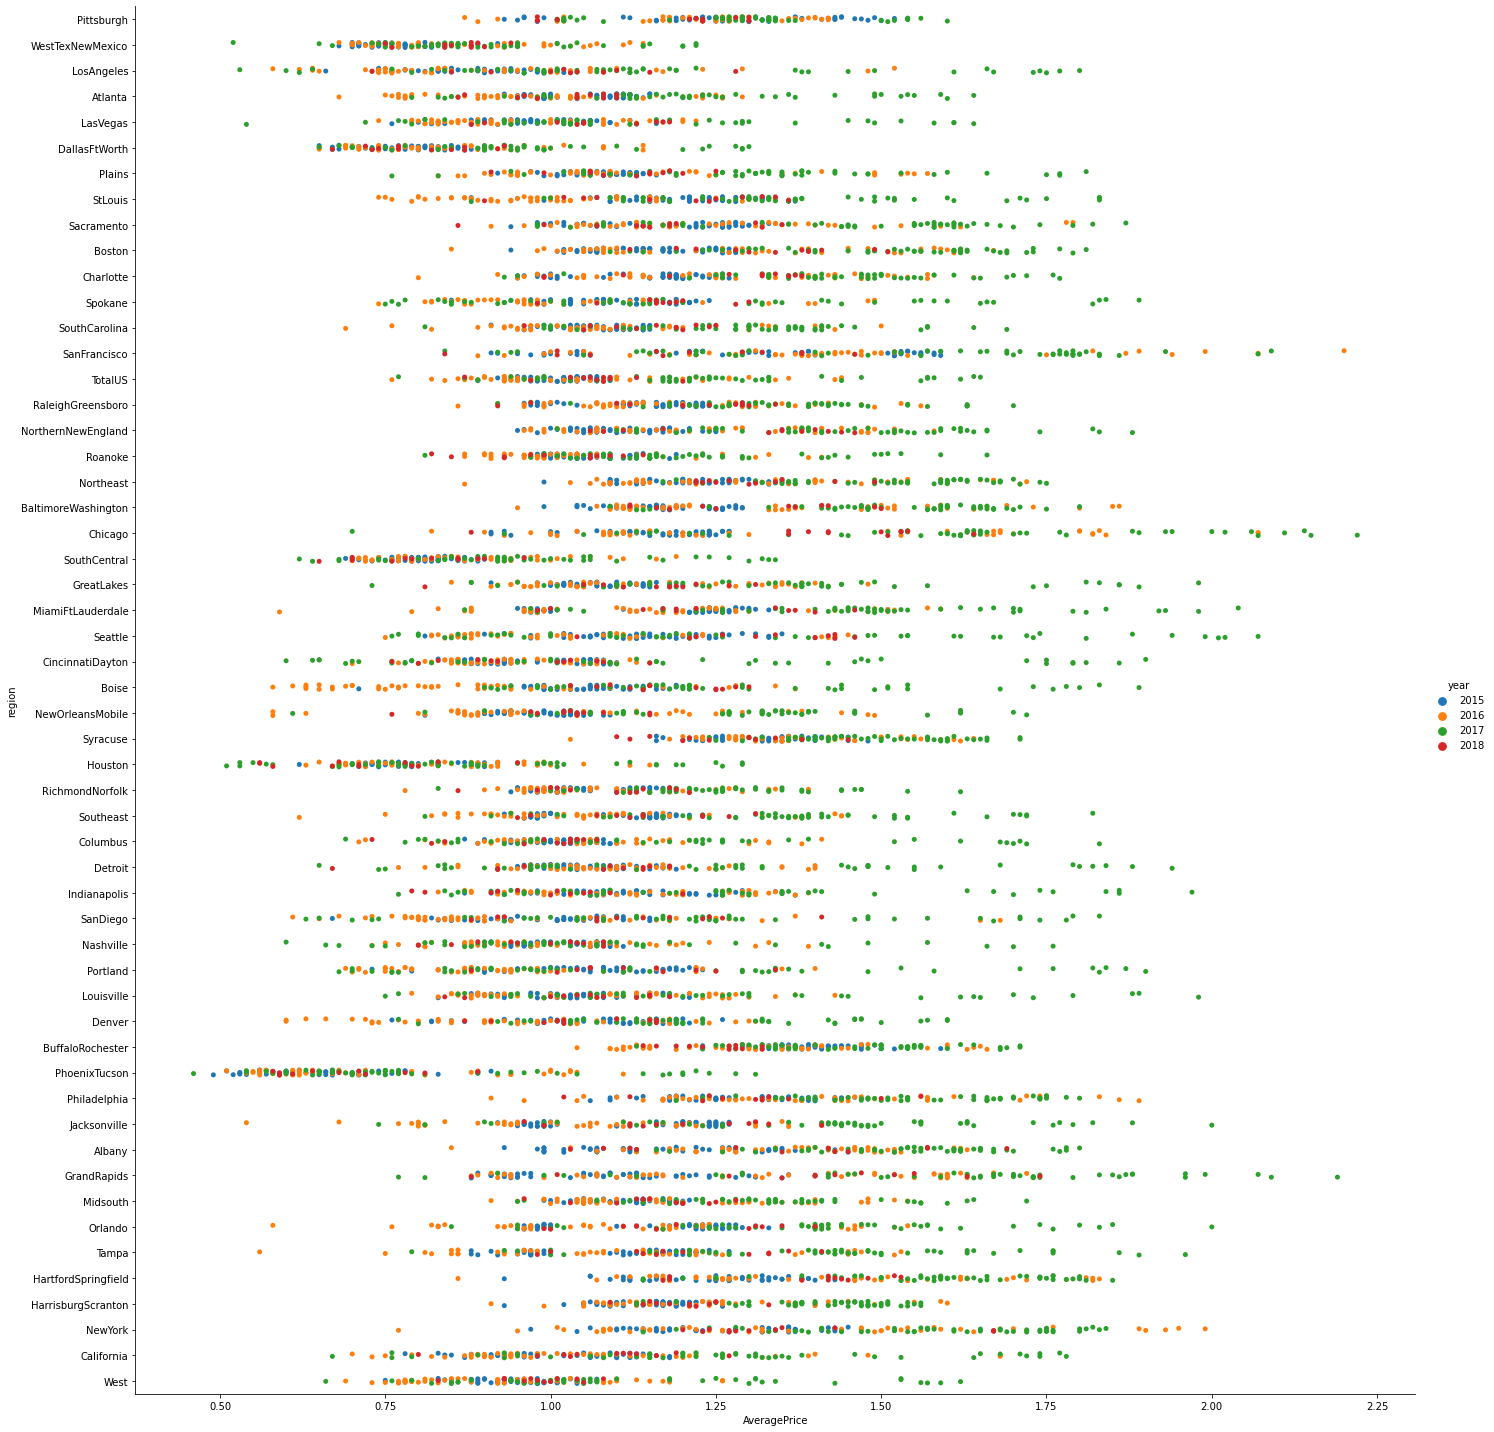

In [63]:
conventional = sns.catplot('AveragePrice', 'region', data=df[df['type'] == 'conventional'], hue='year', height=20)

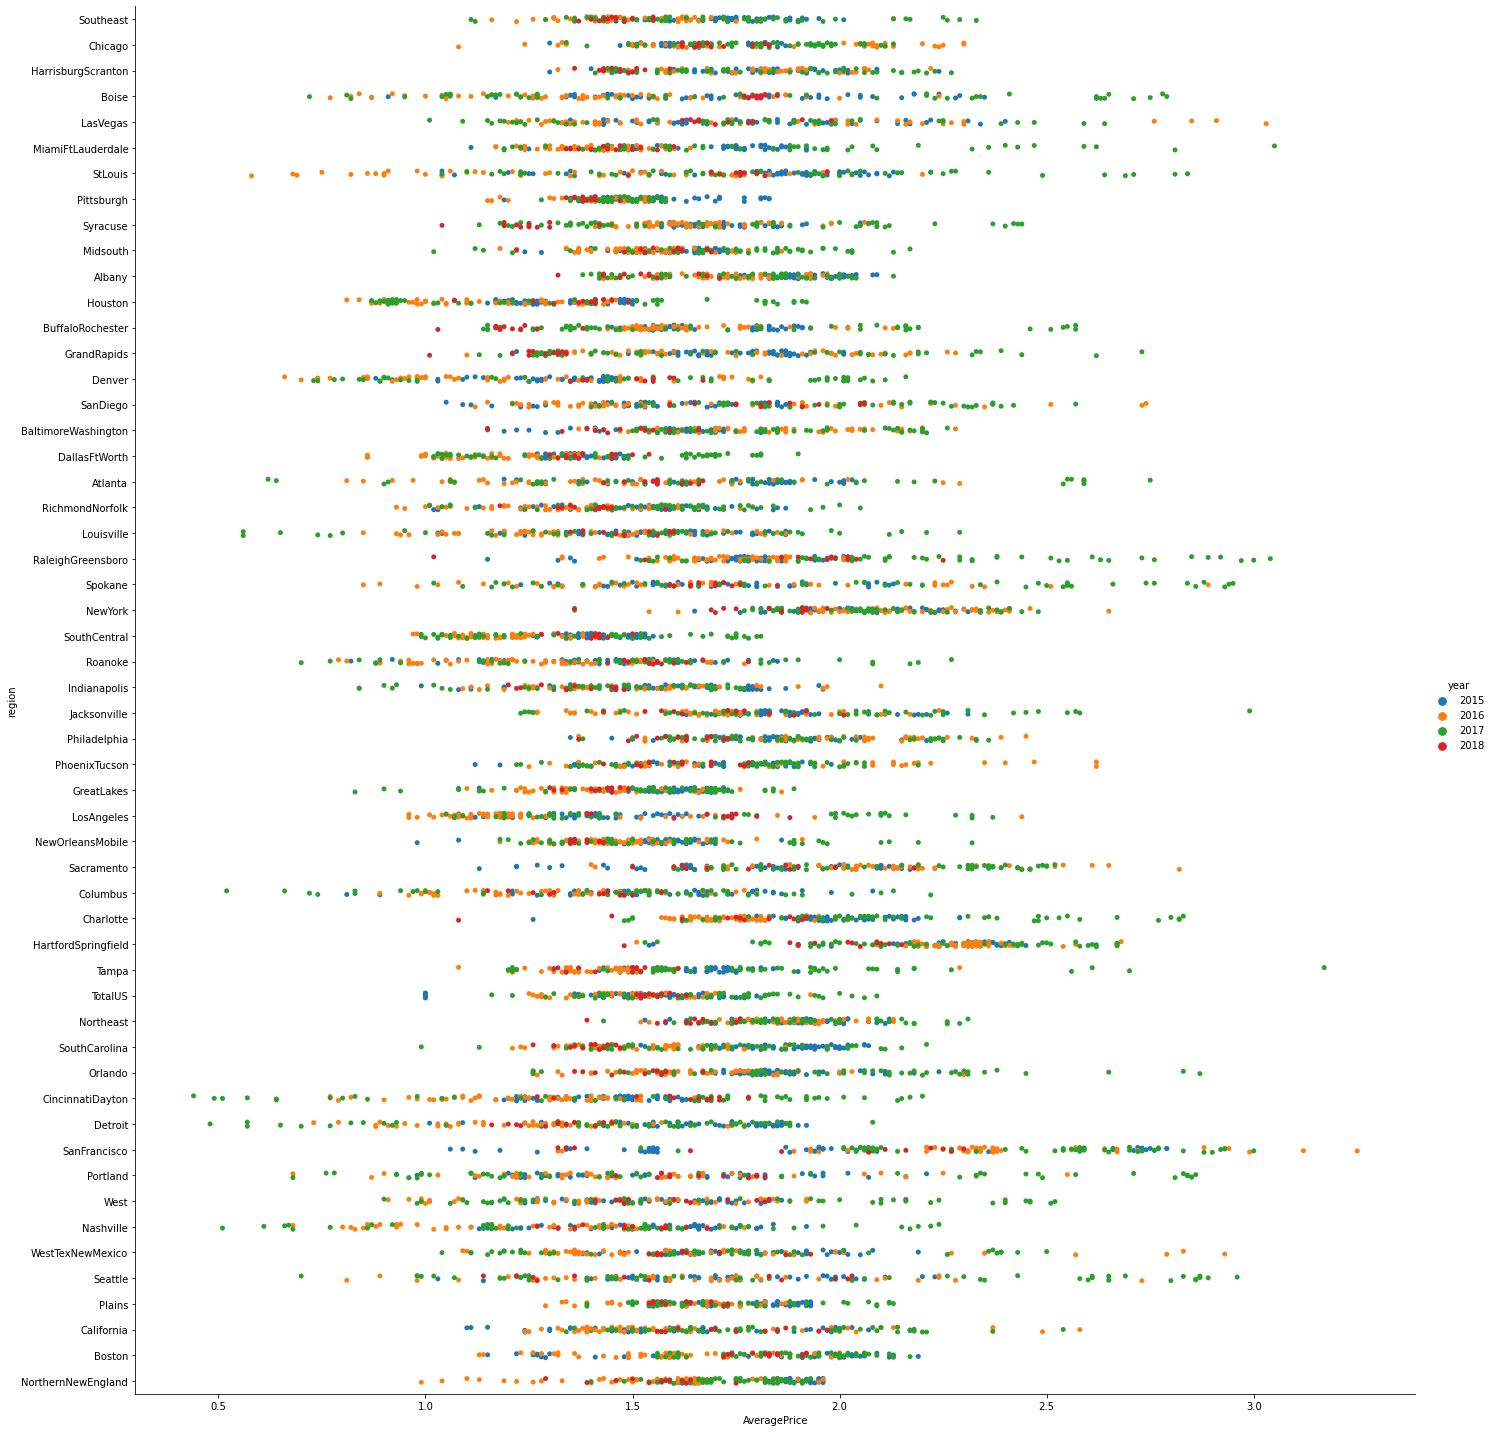

In [64]:
organic = sns.catplot('AveragePrice', 'region', data=df[df['type'] == 'organic'], hue='year', height=20)

**Set up DF for Prophet**

In [65]:
pdf = df[['Date', 'AveragePrice']].rename(columns={'Date':'ds', 'AveragePrice':'y'})
print(pdf)

               ds     y
11569  2015-01-04  1.75
9593   2015-01-04  1.49
10009  2015-01-04  1.68
1819   2015-01-04  1.52
9333   2015-01-04  1.64
...           ...   ...
8574   2018-03-25  1.36
9018   2018-03-25  0.70
18141  2018-03-25  1.42
17673  2018-03-25  1.70
8814   2018-03-25  1.34

[18249 rows x 2 columns]


**Initialize model and make predictions**

In [66]:
m = Prophet()
m.fit(pdf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future = m.make_future_dataframe(365)
forecast = m.predict(future)

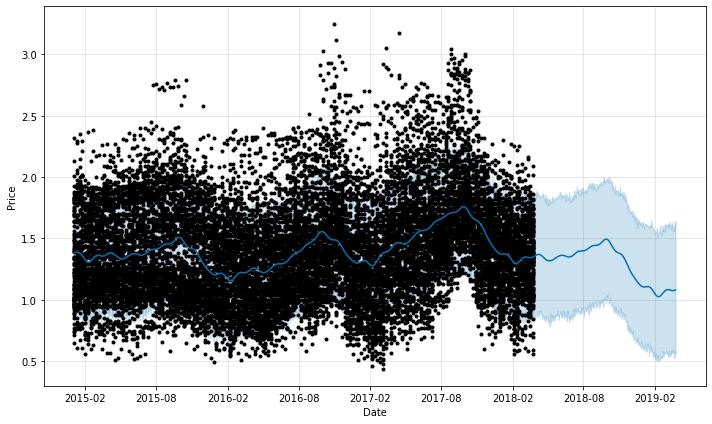

In [68]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

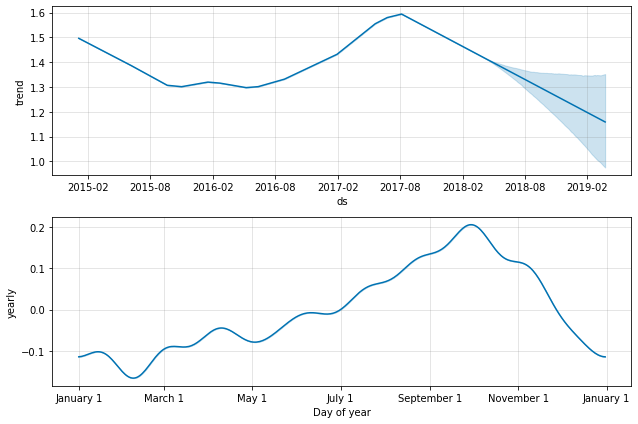

In [69]:
figure2 = m.plot_components(forecast)

**Predictions for only one region**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


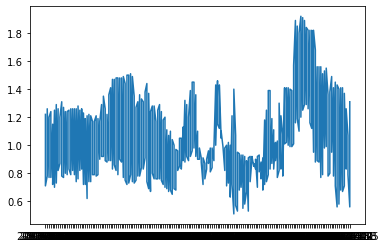

In [70]:
# Houston
dfs = df[df.region == 'Houston'].sort_values('Date')
plt.plot(dfs.Date, dfs.AveragePrice)

In [71]:
pdfs = dfs[['Date', 'AveragePrice']].rename(columns={'Date':'ds', 'AveragePrice':'y'})
print(pdfs)

               ds     y
10113  2015-01-04  1.22
987    2015-01-04  0.71
986    2015-01-11  0.78
10112  2015-01-11  1.26
985    2015-01-18  0.77
...           ...   ...
17819  2018-03-11  1.26
17818  2018-03-18  1.07
8695   2018-03-18  0.79
8694   2018-03-25  0.56
17817  2018-03-25  1.31

[338 rows x 2 columns]


In [72]:
m = Prophet()
m.fit(pdfs)
future = m.make_future_dataframe(365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


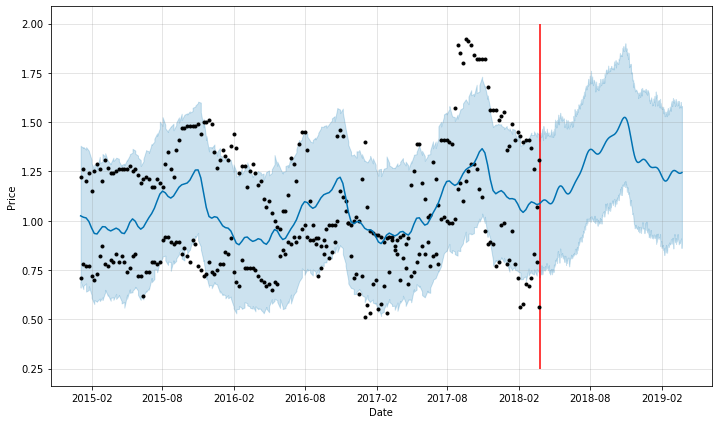

In [113]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

from matplotlib import dates
ln = dates.datestr2num('2018-03-26')
plt.vlines(ln, ymin=0.25, ymax=2, colors='r')

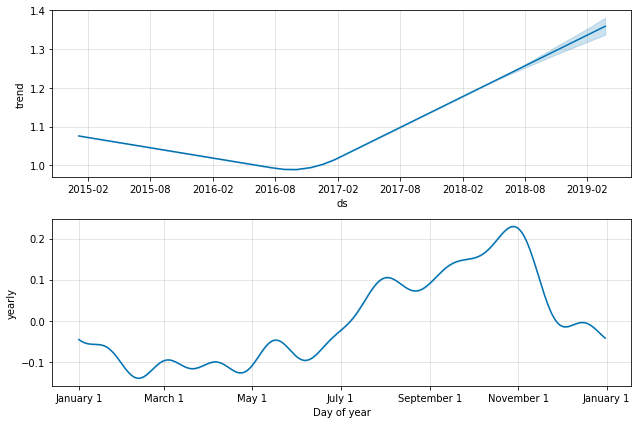

In [115]:
figure2 = m.plot_components(forecast)